In [1]:
import pandas as pd
df=pd.read_csv(r'Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
x=df.iloc[:,3:5]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


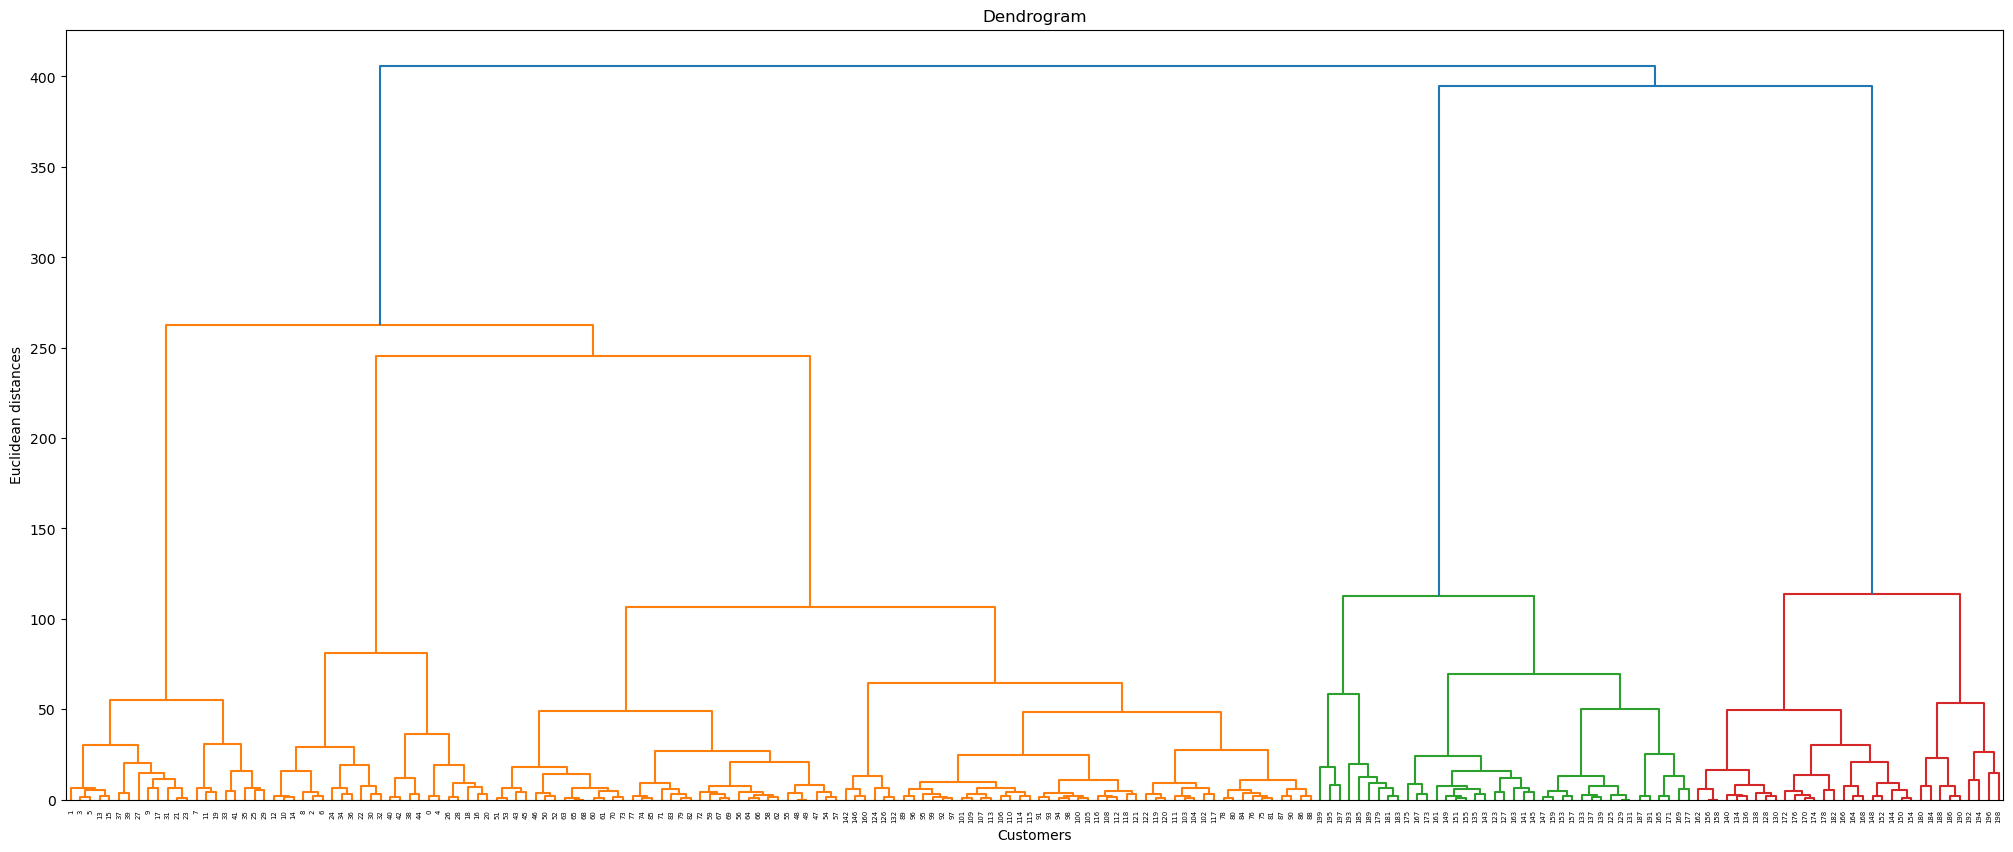

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x, method='ward'))

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

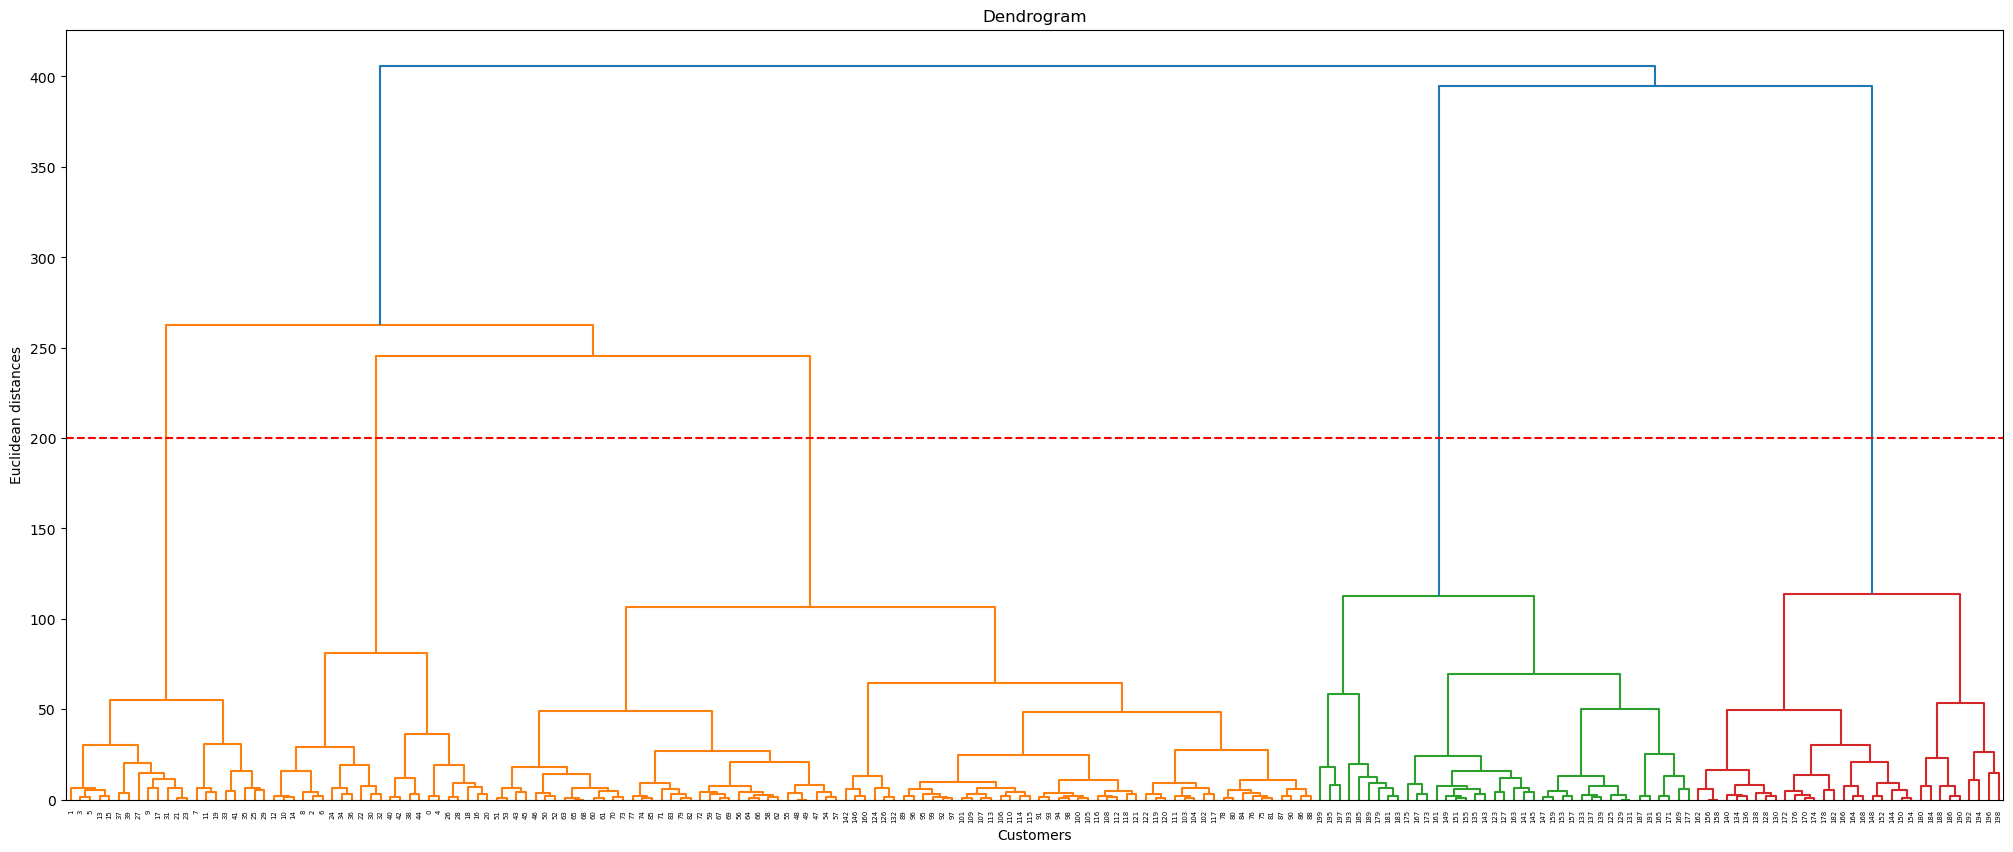

In [12]:
plt.figure(figsize=(25,10))
dendrogram=sch.dendrogram(sch.linkage(x, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.axhline(y=200, color='r',linestyle='--')
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threeshold.
No. of cluster=5

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, metric='euclidean',linkage='ward')

y_hc=hc.fit_predict(x)

In [14]:
x['label']=y_hc
x.head()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


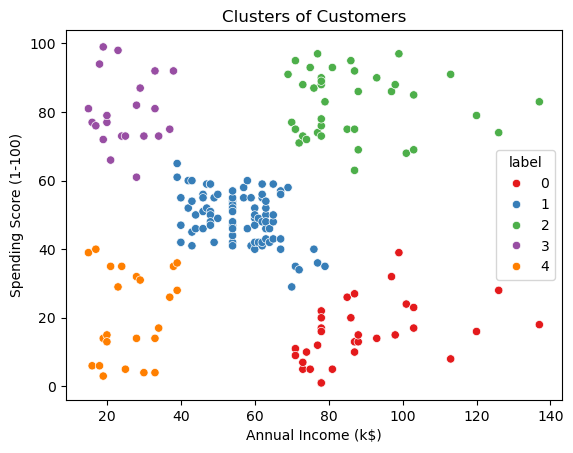

In [17]:
import seaborn as sns
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=x['label'], palette='Set1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Clusters of Customers")
plt.show()

Agglomerative Clustering does not have a 'predict' method for new data points. To predict the cluster for a new point, you would typically use a different clustering algorithm that supports prediction (like k-means) or train a separate classification model based on the existing clusters.